In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../file/연습문제10-4.csv')
df

,dt,AverageTemperature,City,Latitude,Longitude
0,1849-01-01,26.704,Abidjan,5.63N,3.23W
1,1849-02-01,27.434,Abidjan,5.63N,3.23W
2,1849-03-01,28.101,Abidjan,5.63N,3.23W
3,1849-04-01,26.140,Abidjan,5.63N,3.23W
4,1849-05-01,25.427,Abidjan,5.63N,3.23W
...,...,...,...,...,...
239172,2013-05-01,18.979,Xian,34.56N,108.97E
239173,2013-06-01,23.522,Xian,34.56N,108.97E
239174,2013-07-01,25.251,Xian,34.56N,108.97E
239175,2013-08-01,24.528,Xian,34.56N,108.97E


In [3]:
# 1
print(df.head())

           dt  AverageTemperature     City Latitude Longitude
0  1849-01-01              26.704  Abidjan    5.63N     3.23W
1  1849-02-01              27.434  Abidjan    5.63N     3.23W
2  1849-03-01              28.101  Abidjan    5.63N     3.23W
3  1849-04-01              26.140  Abidjan    5.63N     3.23W
4  1849-05-01              25.427  Abidjan    5.63N     3.23W


In [4]:
# 2 컬럼 데이터 타입 변경 (문자열 -> 날짜)
df['dt'] = pd.to_datetime(df['dt'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   dt                  239177 non-null  datetime64[ns]
 1   AverageTemperature  228175 non-null  float64       
 2   City                239177 non-null  object        
 3   Latitude            239177 non-null  object        
 4   Longitude           239177 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 9.1+ MB


In [7]:
# 3 city 컬럼의 결측값 대체
print(df.isnull().sum())
df[['City']] = df[['City']].fillna(df.mode().iloc[0])
print(df.isnull().sum())

dt                        0
AverageTemperature    11002
City                      0
Latitude                  0
Longitude                 0
dtype: int64
dt                        0
AverageTemperature    11002
City                      0
Latitude                  0
Longitude                 0
dtype: int64


In [8]:
# 4 country 컬럼의 결측값 대체
df['AverageTemperature'] = df['AverageTemperature'].fillna(df['AverageTemperature'].mean())
print(df.isnull().sum())

dt                    0
AverageTemperature    0
City                  0
Latitude              0
Longitude             0
dtype: int64


{'whiskers': [<matplotlib.lines.Line2D at 0x266c7267da0>,
 'caps': [<matplotlib.lines.Line2D at 0x266c7298380>,
 'boxes': [<matplotlib.lines.Line2D at 0x266c7266a50>],
 'medians': [<matplotlib.lines.Line2D at 0x266c7298950>],
 'fliers': [<matplotlib.lines.Line2D at 0x266c7298c20>],
 'means': []}

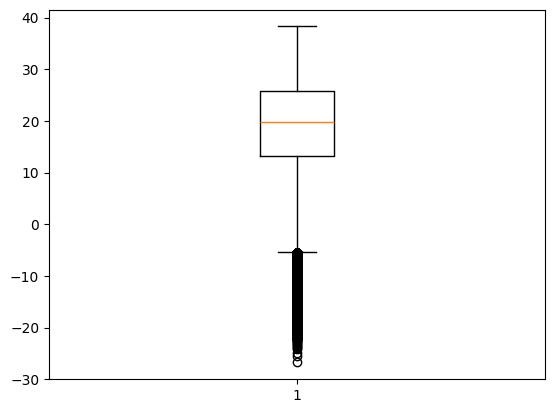

In [11]:
# 5 이상치 확인
plt.boxplot(df.AverageTemperature)

In [12]:
# 6 이상치 제거
df = df[df.AverageTemperature > -2]

{'whiskers': [<matplotlib.lines.Line2D at 0x266c748cec0>,
 'caps': [<matplotlib.lines.Line2D at 0x266c744b980>,
 'boxes': [<matplotlib.lines.Line2D at 0x266c72dc260>],
 'medians': [<matplotlib.lines.Line2D at 0x266c748d8e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x266c748db50>],
 'means': []}

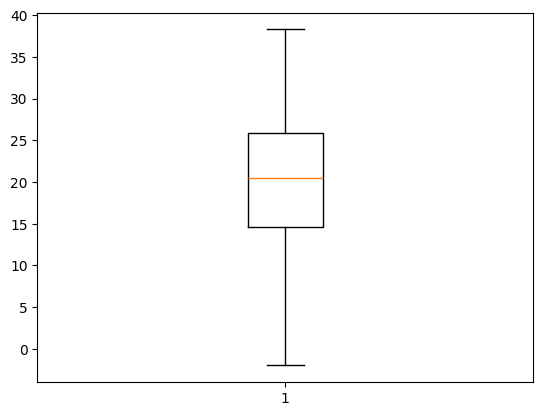

In [13]:
# 7 이상치 확인
plt.boxplot(df.AverageTemperature)

In [14]:
# 8 연도, 월, 일자 데이터 추출 후 새로운 컬럼 추가
df['year'] = df['dt'].dt.year
df['month'] = df['dt'].dt.month
df['day'] = df['dt'].dt.day
df.head()

C:\Users\jangy\AppData\Local\Temp\ipykernel_20388\4104348171.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['dt'].dt.year
C:\Users\jangy\AppData\Local\Temp\ipykernel_20388\4104348171.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['dt'].dt.month
C:\Users\jangy\AppData\Local\Temp\ipykernel_20388\4104348171.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

,dt,AverageTemperature,City,Latitude,Longitude,year,month,day
0,1849-01-01,26.704,Abidjan,5.63N,3.23W,1849,1,1
1,1849-02-01,27.434,Abidjan,5.63N,3.23W,1849,2,1
2,1849-03-01,28.101,Abidjan,5.63N,3.23W,1849,3,1
3,1849-04-01,26.140,Abidjan,5.63N,3.23W,1849,4,1
4,1849-05-01,25.427,Abidjan,5.63N,3.23W,1849,5,1
